In [63]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sb
from datetime import datetime

In [24]:
# The purpose of this project is to do a descriptive analysis of the Airbnb open source data

In [25]:
# Data source link

# http://insideairbnb.com/get-the-data.html

# Datasets used:

# listings_summary.csv

# calendar.csv

# neighbourhoods.csv

# reviews.csv

In [26]:
# Importing datasets

listings = pd.read_csv("C:/Users/Prerit/Desktop/Datatest/Airbnb/Summary files/listing_summary.csv")

In [27]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210


In [28]:
# Shape of the dataset

listings.shape

(19362, 16)

In [29]:
# Listings by room type

by_room_type = listings.groupby(by = 'room_type')[listings.columns[2]].count().sort_values(ascending=False)

by_room_type

room_type
Entire home/apt    15095
Private room        3945
Hotel room           278
Shared room           44
Name: host_id, dtype: int64

In [30]:
type(by_room_type)

pandas.core.series.Series

In [31]:
by_room_type.index

Index(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], dtype='object', name='room_type')

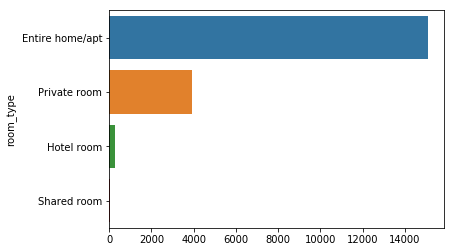

In [32]:
sb.barplot(by_room_type.values, by_room_type.index,)

In [33]:
# There are more number of Entire home/apt listed as compared to others

In [34]:
# But how much does every room type cost on an average ?

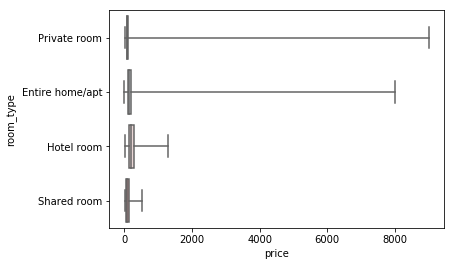

In [35]:
# Using boxplot to describe this

sb.boxplot(x="price", y="room_type", data=listings,
            whis=[0, 100], palette="vlag")

In [36]:
# There is a huge variability in the prices, so averages would be skewed. Lets look at median prices by room type

In [37]:
median_vals = listings.groupby(by = 'room_type')[listings.columns[9]].median().sort_values(ascending = False)

median_vals

room_type
Hotel room         190
Entire home/apt    149
Private room        89
Shared room         80
Name: price, dtype: int64

In [38]:
# So hotel rooms are most expensive in amsterdam

In [39]:
# Lets check out busiest properties in Amsterdam(The ones having lowest availability

In [45]:
max_availability = listings[['name','availability_365']].sort_values(by = 'availability_365', ascending = False)

In [46]:
max_availability.head(20)

,name,availability_365
15568,Wittenberg Two Bedroom Superior Apartment,365
5313,Verhuurd,365
18766,Lovely modern apartment in heart of city center!,365
2952,Longstay room with a view,365
2342,Two bedroom apartment at the Westerpark,365
7548,17 century canal view three story- house,365
6703,2 pers. room with private bathroom and kitchen...,365
10560,Shared apartment for business travellers,365
1576,PERFECTLY LOCATED TRENDY LOFT!,365
3088,Cozy apartment with sunny garden,365


In [47]:
min_availability = listings[['name','availability_365']].sort_values(by = 'availability_365')

In [48]:
min_availability.head(10)

,name,availability_365
9680,Authentic 2P apartment near Jordaan | City Centre,0
10046,Lovely 1 bedroom apt. in Amsterdam East!,0
10047,Perfect family home (with cat !) near centre,0
10048,Shadow of Nature,0
10049,"A-location, Lovely and Spacious Private Apartment",0
10050,Great apartment in city center Amsterdam,0
10051,Traditional & Carefree Urban Mansion @Vondelpark!,0
10052,Private bedroom in shared apartment,0
10053,Amazing three floor house + view on Amstel river,0
10054,Amazing apt with roof terrace next to Vondelpark,0


In [42]:
# Not a useful exercise, looks like a lot of properties have round the year availability, while a lot others have none

In [43]:
# How about looking at histogram of availabiltiy

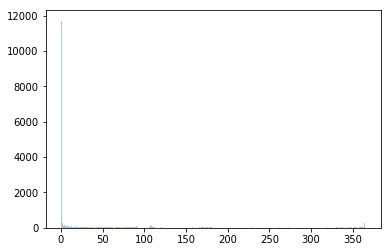

In [44]:
sb.distplot(listings[['availability_365']], bins = 365, kde = False)

In [ ]:
# Most of the properties hace no availability

In [ ]:
# Prices and reviews vary by neighbourhood, but lets find out which neighbourhood are highly rated and expensive

In [67]:
prices_reviews = listings.groupby(by = 'neighbourhood').agg({'price':'mean','reviews_per_month':'mean','neighbourhood':'count'}).sort_values(by='neighbourhood', ascending = False)
prices_reviews.head(10)

,price,reviews_per_month,neighbourhood
neighbourhood,,,
De Baarsjes - Oud-West,151.462056,0.687690,3268
De Pijp - Rivierenbuurt,168.312990,0.728331,2425
Centrum-West,225.150679,1.290186,2137
Centrum-Oost,225.761679,1.113564,1691
Westerpark,152.896792,0.664076,1434
Zuid,182.685131,0.733192,1372
Oud-Oost,146.694071,0.700626,1265
Bos en Lommer,123.933333,0.627937,1110
Oostelijk Havengebied - Indische Buurt,137.800000,0.703395,960


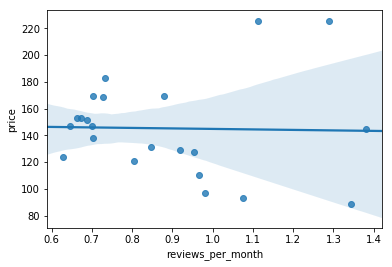

In [66]:
# Building a scatterplot
plot = sb.regplot(x="reviews_per_month", y="price", data = prices_reviews)

In [ ]:
# Seems that there are few neighbourhoods with high # of reviews and low price but there are none with less # of reviews with high price